In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
train_file="./xor_train.txt"
test_file="./xor_test.txt"


# train_file=sys.argv[1]
# test_file=sys.argv[2]
# n = sys.argv[3]

n=2

with open(train_file) as f:
    train=f.read().splitlines()

with open(test_file) as f:
    test=f.read().splitlines()
    
train=np.array([[float(x) for x in y.split()] for y in train])
test=np.array([[float(x) for x in y.split()] for y in test])

train_data=train.shape[0]
tot_features=train.shape[1]-1
assert tot_features==test.shape[1]-1
test_data=test.shape[0]

xtrain=train[:,1:]
ytrain=np.reshape(train[:,0],(train_data,1))
ytrain[ytrain<0]=0

xtest=test[:,1:]
ytest=np.reshape(test[:,0],(test_data,1))
ytest[ytest<0]=0

In [43]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def signum(x):
    return np.sign(x)

def forward_with_bias(x,w,b):
    y=np.matmul(x,w)
    for i in range(b.shape[0]):
        y[:,i] += b[i]
    return y

def crossloss(y,y_):
    return (-y*np.log(y_))-((1-y)*np.log(1-y_))

def downstream(w,dw):
    out=np.zeros(shape=(dw.shape[0],w.shape[0]))
    for i in range(w.shape[0]):
        out[:,i:i+1]=dw*w[i]
    return out

def update_weights(w,dw,x):
    grad=np.matmul(x.T,dw)/x.shape[0]
    w = w - lr*grad
    return w

def update_biases(b,dw):
    x=np.ones(shape=(dw.shape[0],1))
    grad=np.matmul(dw.T,x)
    b = b - lr*grad
    return b

In [44]:
input_neuron=tot_features
output_neuron=1
hidden_neuron=n
hidden_layers=1

lr=0.1
epochs=1000

weight_hidden=np.random.randn(input_neuron,hidden_neuron)
bias_hidden=np.random.randn(hidden_neuron,1)
weight_output=np.random.rand(hidden_neuron,output_neuron)
bias_output=np.random.rand(output_neuron,1)
        

print(weight_hidden.shape,bias_hidden.shape)
print(weight_output.shape,bias_output.shape)

(2, 2) (2, 1)
(2, 1) (1, 1)


In [45]:
losses=[]
for i in range(epochs):
    
    index=list(range(len(xtrain)))
    np.random.shuffle(index)
    xtrain,ytrain=xtrain[index],ytrain[index]

    hidden=sigmoid(forward_with_bias(xtrain,weight_hidden,bias_hidden))
    output=sigmoid(forward_with_bias(hidden,weight_output,bias_output))
    loss=crossloss(ytrain,output)
    if(i%100==0):
        losses.append(loss.mean())
    
    derivative_weight_output = (output-ytrain)
    derivative_weight_hidden = hidden*(1-hidden)
    derivative_weight_hidden *= downstream(weight_output,derivative_weight_output)

    weight_output = update_weights(weight_output,derivative_weight_output,hidden)
    bias_output = update_biases(bias_output,derivative_weight_output)

    weight_hidden = update_weights(weight_hidden,derivative_weight_hidden,xtrain)
    bias_hidden = update_biases(bias_hidden,derivative_weight_hidden)

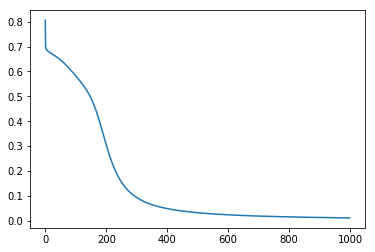

In [46]:
plt.plot(list(range(len(losses))),losses)

In [47]:
hidden=sigmoid(forward_with_bias(xtest,weight_hidden,bias_hidden))
output=sigmoid(forward_with_bias(hidden,weight_output,bias_output))
output[output>0.5]=1
output[output<=0.5]=0
loss=output-ytest
output[output==0]=-1

print("Test Output : {}".format(output))
print("Test Loss : {}".format(loss))

with open("output.txt","w+") as f:
    
    f.writelines("w = ")
    f.write(str(weight_output))
    f.writelines("\n")
    f.writelines("w = ")
    f.write(str(weight_hidden))
    f.writelines("\n")
    for i in range(len(losses)):
        f.writelines("i= {}   Objective : {} \n".format(i,losses[i]))

### answers 

1. yes approximately, final training error is around 0.014
2. yes, right now we're taking all the training data in each epoch, for SGD randomly take 1 data point in each epoch
3. No, for both of them test error is 0.
4. same algorithm works, just the derivative value changes.